In [421]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [422]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report  # classification report is used to find Accuracy, F1 score,precision

In [423]:
claimants=pd.read_csv("claimants (1).csv")
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [424]:
claimants.head(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [425]:
claimants.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0


In [426]:
claimants.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


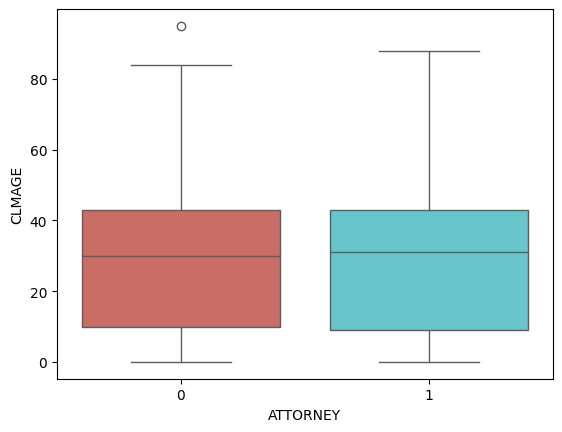

In [427]:
import warnings
warnings.filterwarnings("ignore")
sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls") #palette is for the color combinations
plt.show()

In [428]:
#dropping the first column
claimants.drop(columns=["CASENUM"],inplace=True,axis=1) #axis=0 for operating on rows,#axis=1 to operate on columns
#inplace is used to show the dataset after we dropped the columns

In [429]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


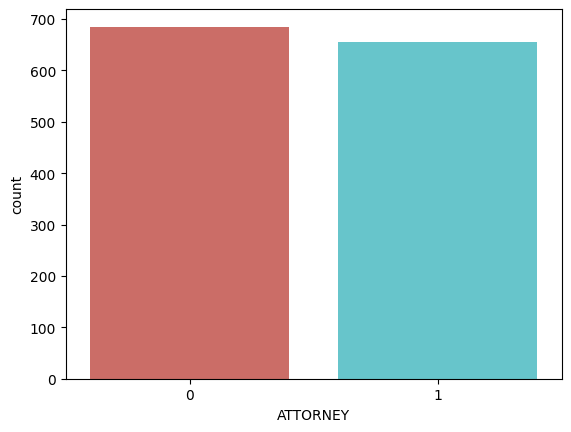

In [430]:
sb.countplot(x="ATTORNEY",data=claimants,palette="hls")
plt.show()

In [431]:
# 0-Having Attorney
# 1- No attorney
# from above  0s >1s that means consulting attorneys is greater than not consulting attorney

In [432]:
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR)

CLMINSUR,0.0,1.0
ATTORNEY,,
0,76,585
1,44,594


In [433]:
# 0-Uninsured-> No Insurance
# 1-Insured-> Having Insurance
# people who consult attorney(0) having INsurance(1) are 585 people
# 76 people consult attorney and no Insurance
# 44 people won't consult attorney and no Insurance
# 594 people wont' consult attorney and have Insurance


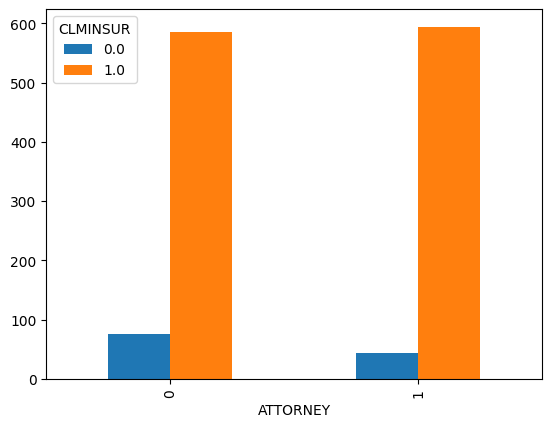

In [434]:
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind='bar')
plt.show()

This bar chart shows the relationship between having an attorney (ATTORNEY) and having insurance (CLMINSUR).

- The blue bars represent claimants who do **not** have insurance (CLMINSUR = 0.0).
- The orange bars represent claimants who **do** have insurance (CLMINSUR = 1.0).

From the chart, we can see:

- Among those who consult an attorney (ATTORNEY = 0), a significantly larger number have insurance compared to those who don't.
- Among those who do not consult an attorney (ATTORNEY = 1), a significantly larger number also have insurance compared to those who don't.

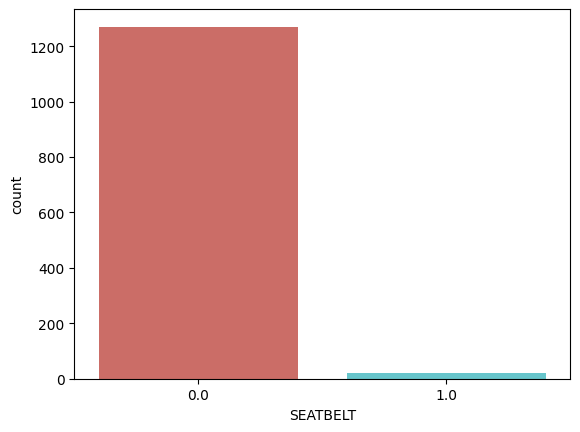

In [435]:
sb.countplot(x="SEATBELT",data=claimants,palette="hls")
plt.show()

In [436]:
# 0 means wearing seatbelt and 1 means not wearing seatbelt
# wearing seatbelt > not wearing seat belt

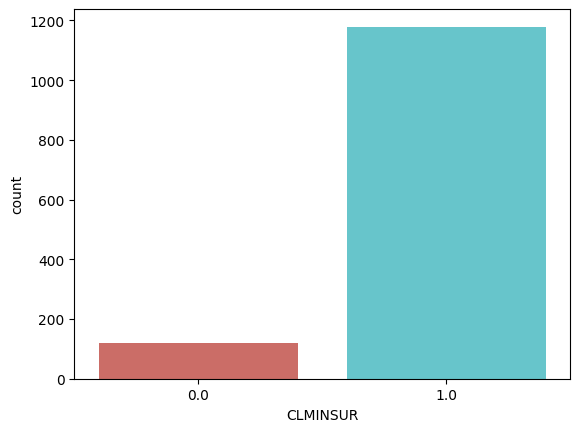

In [437]:
sb.countplot(x="CLMINSUR",data=claimants,palette="hls")
plt.show()

In [438]:
# drivers uninsured is lesser than people who are Insuranced

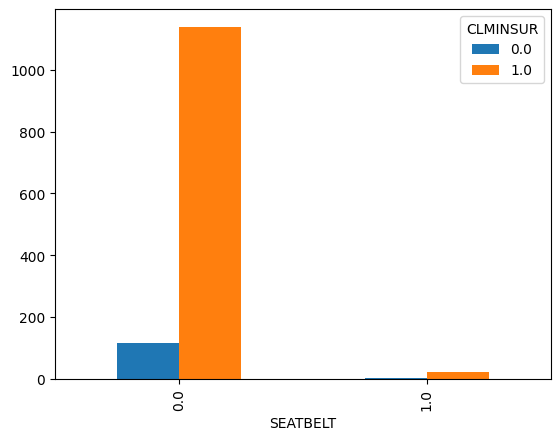

In [439]:
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")
plt.show()

In [440]:
# people who wore seat belt(0) = Insured people(orange(1))> uninsured(blue(0))
# people who didn't wore seat belt(1)= Insured people(o(1))> uninsured(b(0))

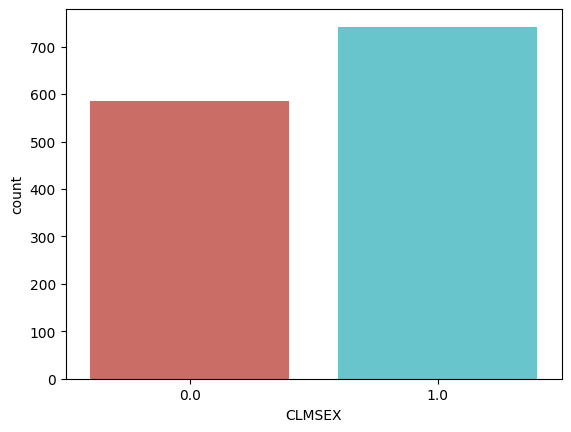

In [441]:
sb.countplot(x="CLMSEX",data=claimants,palette="hls")
plt.show()

In [442]:
# females(1) > males(0)

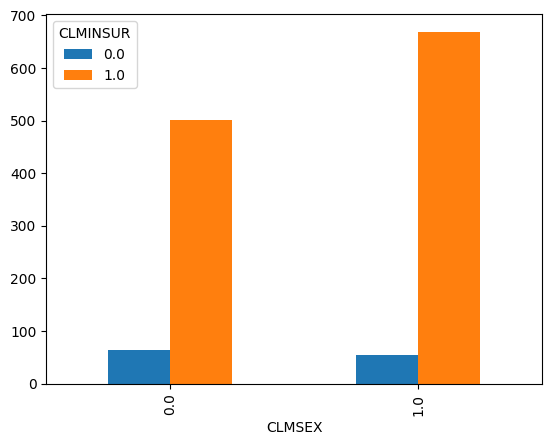

In [443]:
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")
plt.show()

This bar chart shows the relationship between gender (CLMSEX) and whether or not a claimant has insurance (CLMINSUR).

- The blue bars represent claimants who do **not** have insurance (CLMINSUR = 0.0).
- The orange bars represent claimants who **do** have insurance (CLMINSUR = 1.0).

From the chart, we can see:

- Among males (CLMSEX = 0.0), a larger number have insurance compared to those who don't.
- Among females (CLMSEX = 1.0), a larger number also have insurance compared to those who don't, and the number of insured females is slightly higher than insured males.

In [444]:
claimants.isnull().sum()

,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0


In [445]:
claimants.shape

(1340, 6)

In [446]:
claimants["CLMSEX"].fillna(1,inplace=True)
claimants["CLMINSUR"].fillna(1,inplace=True)
claimants["SEATBELT"].fillna(0,inplace=True)

In [447]:
claimants.CLMSEX.mode()

,CLMSEX
0,1.0


In [448]:
claimants.CLMINSUR.mode()

,CLMINSUR
0,1.0


In [449]:
claimants.SEATBELT.mode()

,SEATBELT
0,0.0


In [450]:
claimants.CLMAGE.mean()

np.float64(28.414422241529106)

In [451]:
claimants.CLMAGE.fillna(28.4144,inplace=True)

In [452]:
claimants.isnull().sum()

,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0


In [453]:
from sklearn.linear_model import LogisticRegression
claimants.shape

(1340, 6)

In [454]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0000,34.940
1,1,1.0,0.0,0.0,18.0000,0.891
2,1,0.0,1.0,0.0,5.0000,0.330
3,0,0.0,1.0,1.0,31.0000,0.037
4,1,0.0,1.0,0.0,30.0000,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576
1336,0,1.0,1.0,0.0,46.0000,3.705
1337,1,1.0,1.0,0.0,39.0000,0.099
1338,0,1.0,0.0,0.0,8.0000,3.177


In [455]:
#print('Claimants: ')
#print(claimants)
X=claimants.iloc[:,[1,2,3,4,5]]
#print('X: ')
#print(X)
Y=claimants.iloc[:,0]
#print('Y: ')
#print(Y)
classifier=LogisticRegression()
classifier.fit(X,Y)
#print(classifier)

LogisticRegression()

In [456]:
Y

,ATTORNEY
0,0
1,1
2,1
3,0
4,1
...,...
1335,1
1336,0
1337,1
1338,0


In [457]:
#print('classifier: ')
#print(classifier)

In [458]:
classifier.coef_

array([[ 0.31687491,  0.5055026 , -0.52613497,  0.00660526, -0.32241077]])

In [459]:
# the above results are beta0,beta1,beta2,beta3,beta4

In [460]:
print('X: ')
print(X)

X: 
      CLMSEX  CLMINSUR  SEATBELT   CLMAGE    LOSS
0        0.0       1.0       0.0  50.0000  34.940
1        1.0       0.0       0.0  18.0000   0.891
2        0.0       1.0       0.0   5.0000   0.330
3        0.0       1.0       1.0  31.0000   0.037
4        0.0       1.0       0.0  30.0000   0.038
...      ...       ...       ...      ...     ...
1335     0.0       1.0       0.0  28.4144   0.576
1336     1.0       1.0       0.0  46.0000   3.705
1337     1.0       1.0       0.0  39.0000   0.099
1338     1.0       0.0       0.0   8.0000   3.177
1339     1.0       1.0       0.0  30.0000   0.688

[1340 rows x 5 columns]


In [461]:
classifier.predict_proba(X)

array([[9.99974053e-01, 2.59465658e-05],
       [4.95419392e-01, 5.04580608e-01],
       [4.25079704e-01, 5.74920296e-01],
       ...,
       [2.85388975e-01, 7.14611025e-01],
       [6.86705235e-01, 3.13294765e-01],
       [3.38824277e-01, 6.61175723e-01]])

In [462]:
# column1 is % of not consulting a lawyer(0), column2 is prediction of % of consulting an attorney(1)

In [463]:
y_pred=classifier.predict(X)
#print('y pred: ')
#print(y_pred)
claimants["y_pred"]=y_pred
#print('claimants: ')
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
0,0,0.0,1.0,0.0,50.0000,34.940,0
1,1,1.0,0.0,0.0,18.0000,0.891,1
2,1,0.0,1.0,0.0,5.0000,0.330,1
3,0,0.0,1.0,1.0,31.0000,0.037,1
4,1,0.0,1.0,0.0,30.0000,0.038,1
...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1
1336,0,1.0,1.0,0.0,46.0000,3.705,0
1337,1,1.0,1.0,0.0,39.0000,0.099,1
1338,0,1.0,0.0,0.0,8.0000,3.177,0


In [464]:
# 0 = consulting Attorney
# 1 = not consulting Attorney

In [465]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[435 250]
 [147 508]]


In [466]:
#claimants

In [467]:
pd.crosstab(y_pred,Y)

ATTORNEY,0,1
row_0,,
0,435,147
1,250,508


In [468]:
# ATTORNEY:
#  0-consults attorney, 1- not consult attorney

In [469]:
# 435= TN
# 508 =TP
# 147= FN
# 250= FP

In [470]:
#finding accuracy= ((TP+TN)/(TP+TN+FP+FN))
print('claimants shape                       :',claimants.shape)
print('cliamnts total no items or row values : ',claimants.shape[0])
accuracy=sum(Y==y_pred)/claimants.shape[0]
print('accuracy                              : ',accuracy)

claimants shape                       : (1340, 7)
cliamnts total no items or row values :  1340
accuracy                              :  0.7037313432835821


In [471]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



The classification report provides several key metrics to evaluate the performance of your classification model:

- **precision**: The ability of the classifier not to label as positive a sample that is negative. It's the ratio of true positives to the sum of true positives and false positives.
- **recall**: The ability of the classifier to find all the positive samples. It's the ratio of true positives to the sum of true positives and false negatives. Also known as Sensitivity.
- **f1-score**: The harmonic mean of precision and recall. It's a way to combine precision and recall into a single metric.
- **support**: The number of actual occurrences of the class in the specified dataset.
- **accuracy**: The proportion of correct predictions among the total number of cases examined.
- **macro avg**: The average of the precision, recall, and f1-score for each class, without considering the class imbalance.
- **weighted avg**: The average of the precision, recall, and f1-score for each class, weighted by the number of instances in each class.

In your output:

- **Class 0 (ATTORNEY=0 - consulting attorney):**
    - Precision: 0.75 - When the model predicts a claimant consults an attorney, it is correct 75% of the time.
    - Recall: 0.64 - The model correctly identifies 64% of all claimants who actually consult an attorney.
    - F1-score: 0.69
    - Support: 685 - There are 685 claimants who actually consult an attorney in the dataset.

- **Class 1 (ATTORNEY=1 - not consulting attorney):**
    - Precision: 0.67 - When the model predicts a claimant does not consult an attorney, it is correct 67% of the time.
    - Recall: 0.78 - The model correctly identifies 78% of all claimants who actually do not consult an attorney.
    - F1-score: 0.72
    - Support: 655 - There are 655 claimants who actually do not consult an attorney in the dataset.

- **Accuracy:** 0.70 - Overall, the model correctly predicts whether a claimant consults an attorney or not about 70% of the time.

- **Macro Avg:** The macro average metrics are the simple average of the precision, recall, and f1-score for both classes.

- **Weighted Avg:** The weighted average metrics are calculated by considering the number of instances in each class. This is useful when you have an imbalanced dataset.

In [472]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

np.float64(0.7053045077171672)

In [473]:
#Y
classifier.predict_proba(X)

array([[9.99974053e-01, 2.59465658e-05],
       [4.95419392e-01, 5.04580608e-01],
       [4.25079704e-01, 5.74920296e-01],
       ...,
       [2.85388975e-01, 7.14611025e-01],
       [6.86705235e-01, 3.13294765e-01],
       [3.38824277e-01, 6.61175723e-01]])

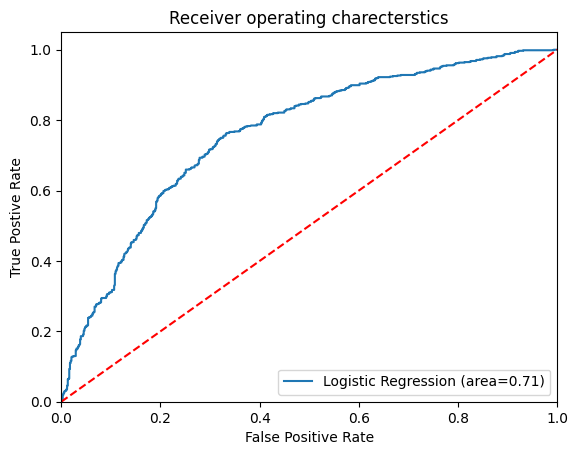

In [474]:
fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)' %Logit_roc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating charecterstics')
plt.legend(loc='lower right')
plt.show()

In [475]:
import statsmodels.api as sm

In [476]:
logit=sm.Logit(Y,X)

In [477]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.609294
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1335
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 Sep 2025   Pseudo R-squ.:                  0.1207
Time:                        18:12:03   Log-Likelihood:                -816.45
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 2.515e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLMSEX         0.3005      0.116      2.591      0.010       0.073       0.528
CLMINSUR       0.4167      0.124      3.364      0.001       0.174       0.660
SEATBELT      -0.6828      0.522     -1.308      0.191      -1.706       0.341
CLMAGE         0.0059      0.003      1.951      0.051   -2.58e-05       0.012
LOSS          -0.3262      0.029    -11.234      0.000      -0.383      -0.269
==============================================================================
"""

You're right to notice the p-values in the `statsmodels` summary! The p-value is crucial for determining the statistical significance of each predictor variable in your model.

Here's a more detailed explanation regarding your observation about 'SEATBELT' and 'CLMAGE':

**Why p-values are often compared to 0.05:**

- The threshold of 0.05 (or 5%) is a commonly used **significance level (alpha)** in statistical hypothesis testing.
- It represents the probability of rejecting the null hypothesis when it is actually true (Type I error).
- If the p-value is less than or equal to alpha (p <= 0.05), we consider the result statistically significant, meaning there is strong evidence to reject the null hypothesis.
- If the p-value is greater than alpha (p > 0.05), we consider the result not statistically significant, meaning there is not enough evidence to reject the null hypothesis.

**Interpreting the p-values for 'SEATBELT' and 'CLMAGE':**

In the `statsmodels` summary for your logistic regression model:

- **SEATBELT:** The p-value is 0.191, which is greater than 0.05. This suggests that, at a 0.05 significance level, the variable 'SEATBELT' is **not statistically significant** in predicting whether a claimant consults an attorney. This means the observed relationship between wearing a seatbelt and consulting an attorney in your data could reasonably be due to random chance.

- **CLMAGE:** The p-value is 0.051, which is also greater than 0.05 (although just barely). This suggests that, at a 0.05 significance level, the variable 'CLMAGE' is **not statistically significant** in predicting whether a claimant consults an attorney. Similar to 'SEATBELT', the observed relationship between age and consulting an attorney might be due to random chance.

**What does this mean for your model?**

When a predictor variable has a non-significant p-value (greater than alpha), it implies that there isn't enough statistical evidence to conclude that it has a meaningful influence on the outcome variable in your model. In some cases, you might consider removing such variables from the model to simplify it and potentially improve its overall performance, especially if you are aiming for a parsimonious model. However, the decision to remove variables should also consider domain knowledge and the practical significance of the variable.

In [478]:
thresholds.shape

(551,)

In [479]:
classifier.predict_proba(X)[:1]


array([[9.99974053e-01, 2.59465658e-05]])

In [480]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
  y_pred=np.where(classifier.predict_proba(X)[:,1]>thres,1,0)
  accuracy_ls.append(accuracy_score(Y,y_pred,normalize=True))
accuracy_ls=pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns=['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls

,thresholds,accuracy
320,5.285839e-01,0.713433
321,5.250989e-01,0.713433
317,5.325968e-01,0.712687
319,5.293810e-01,0.712687
311,5.392520e-01,0.712687
...,...,...
0,inf,0.511194
1,7.689822e-01,0.511194
548,1.435155e-11,0.492537
549,7.994528e-12,0.491791


In [489]:
from numpy import argmax
#print('tpr: ')
#print(tpr)
#print('fpr: ')
#print(fpr)
J=tpr-fpr
ix=argmax(J)
#print('ix: ')
#print(ix)
best_thresh=thresholds[ix]
print('Best Thresholds=%f '%best_thresh)

Best Thresholds=0.525099 


In [491]:
#classifier.predict_proba(X)[:,1]

In [492]:
threshold=0.525080
preds=np.where(classifier.predict_proba(X)[:,1]>threshold,1,0)
print(classification_report(Y,preds))

              precision    recall  f1-score   support

           0       0.75      0.67      0.70       685
           1       0.69      0.76      0.72       655

    accuracy                           0.71      1340
   macro avg       0.72      0.72      0.71      1340
weighted avg       0.72      0.71      0.71      1340

